In [14]:
import pandas as pd  
   


In [15]:


import time
start_time = time.time()
df = pd.read_excel('https://github.com/krkhalil/data_grocessary/blob/main/active%20article%20detail%201.xlsx',skiprows=5)
df
print("--- %s seconds ---" % (time.time() - start_time))

XLRDError: ignored

In [ ]:
start_time = time.time()
df.isna().sum()
print("--- %s seconds ---" % (time.time() - start_time))


In [ ]:
Product_name = df['Unnamed: 5'].unique()
serial_no  = df['Art SubSys'].unique()
print(len(serial_no))
print(len(Product_name))
scr = []
Product = []
for i in range(0,600):
  scr.insert(i,serial_no[i])
  Product.insert(i,Product_name[i])

print('here is get product and it serial id')
print(len(scr))
print(len(Product))

In [ ]:
dic = {}
for i in range(0,600):
  dic.update({scr[i]:Product[i]})
print(dic)

In [ ]:
#here is handling the products and there serial ids as both must be in a sequence
import random
final_products = []
final_serial = []

for i in range(0,1000):
  key,value=random.choice(list(dic.items()))
  final_products.insert(i,key)
  final_serial.insert(i,value)



In [ ]:
#here i am generating the Quantity of the products

quan = []
for i in range(0,1000):
  num1 = random.randint(1, 99)
  quan.insert(i,num1)


len(quan)

In [ ]:
#here i am generating the reciept id  of the saling products

recpiet_id = []
for i in range(0,1000):
  aa = random.randint(1,200)
  recpiet_id.insert(i,'0000'+str(aa))

sor = sorted(recpiet_id, reverse=False)




In [ ]:
#here i am setting price of the product
pri = []
for i in range(0,1000):
  pr = random.randint(2, 9999)
  pri.insert(i,pr)


len(pri)

In [ ]:
import random
import time


def str_time_prop(start, end, format, prop):
    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(format, time.localtime(ptime))
def random_date(start, end, prop):
    return str_time_prop(start, end, '%m/%d/%Y %I:%M %p', prop)

dat = []
vari = random_date("1/1/2018 9:00 AM", "12/31/2018 10:00 PM", random.random())

for i in range(0,999):
  if sor[i]==sor[i+1]:
    dat.insert(i,vari)
  else:
    vari = random_date("1/1/2018 9:00 AM", "12/31/2018 10:00 PM", random.random())
    dat.insert(i,vari)

dat.insert(len(dat)+1,vari)


In [ ]:
#here i am generating the Unit_price
Unit_price = []
for i in range(0,1000):
  Unit_price.insert(i,pri[i]/quan[i])
len(Unit_price)

In [ ]:
#here i am generating the cost price
cost_price = []
for i in range(0,1000):
  get = (5/100)*Unit_price[i]
  cos = Unit_price[i]-get
  cost_price.insert(i,cos)

len(cost_price)

cost_price[4]


In [ ]:
#here i am setting all the values into a dictionary   
dict = {'Products':final_serial, 'Reciept_ID':sor,'Serial No.': final_products, 'Quantity':quan, 'Sales Price':pri,'Unit Price':Unit_price,'Cost_Price':cost_price, 'Date and Time':sorted(dat,reverse=False)}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('finaldataset.csv')

In [ ]:
df = pd.read_csv('/content/finaldataset.csv')
df.head(10)

In [ ]:
 new_df = df[['Products','Serial No.','Quantity']].value_counts().to_frame()
 new_df

In [ ]:
df[['Serial No.','Products','Quantity','Sales Price']].head(20)


In [ ]:
df[['Serial No.','Products','Quantity','Sales Price']]

In [ ]:

df1 = df[['Products','Reciept_ID','Serial No.','Quantity','Sales Price','Unit Price','Cost_Price','Date and Time']]
df1

In [ ]:
df1.head(10)

In [ ]:
#view of the information of the dataset
df1.info()

In [ ]:
#generation the corealltion martix textually
corrMatrix = df1.corr()
corrMatrix

In [ ]:
#representing the corealtion between the data columns graphically
import matplotlib.pyplot as plt

import seaborn as sn

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
print(df1['Sales Price'].describe())


In [ ]:
import seaborn as sn
plt.figure(figsize=(9, 8))
sn.distplot(df1['Sales Price'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
list(set(df1.dtypes.tolist()))

In [ ]:
df_num = df1.select_dtypes(include = ['float64', 'int64'])
df_num.head()

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sn.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Sales Price'])

In [ ]:
corr = df_num.drop('Sales Price', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sn.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_num["Sales Price"],df1['Products'])

**Seeing the column names from the data frame df1**

In [ ]:
df1.columns

Here i am showing the total number of products sale at onece and then shown=ing it onto the graph


In [ ]:
sn.countplot(df1['Products'])
df1['Products'].value_counts()

In [ ]:
df1['Products'].value_counts().head(20).to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sn.heatmap(df_num.corr(), annot=True)

**Classification**

In [ ]:
import pandas as pd
import numpy as n
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
path = "https://raw.githubusercontent.com/krkhalil/data_grocessary/main/finaldataset.csv"
df = pd.read_csv(path)
df


In [ ]:
df.columns
#fdf = df.drop(['Unnamed:0'], axis=1)


In [ ]:
fdf = df.drop(['Unnamed: 0'], axis=1)
fdf

In [ ]:
X=fdf.drop(['Products','Date and Time'],axis=1)
y=fdf['Products']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [ ]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

In [ ]:
predict=clf.predict(X_test)
predict


In [ ]:
confusion_matrix(y_test,predict)


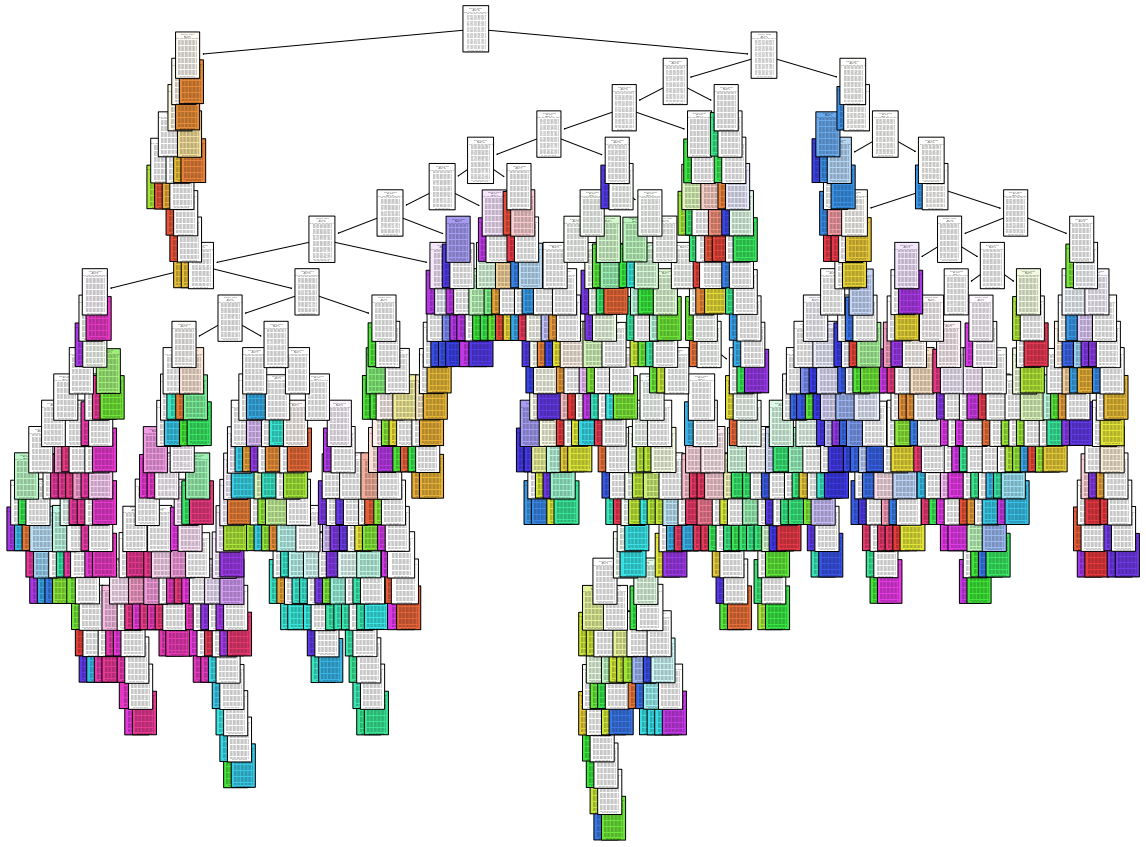

In [13]:
import matplotlib.pyplot as plt
feature_names = fdf.columns[:]
target_names = fdf['Products'].unique().tolist()
plt.figure(figsize=(20,15))
a=plot_tree(clf, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)